In [4]:
import cmath
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# (-1, 1)    (0, 1)    (1, 1)
# (-1, 0)  <- 0, 0 ->  (1, 0)
# (-1,-1)    (0,-1)    (1,-1)

In [70]:
angles = [
    (0,1),
    (1,1),
    (1,0),
    (1,-1),
    (0,-1),
    (-1,-1),
    (-1,0),
    (-1,1)
]


In [71]:
# 315   0    45
# 270   o    90
# 225  180   135

In [72]:
def bearing(a):
    angle_rad = cmath.phase(a) 
    angle_deg = math.degrees(angle_rad)
    #bearing1 = (angle + 360) % 360
    #print(angle_rad)
    return (90 - angle_deg) % 360

In [82]:
for a in angles:
    v = complex(a[0],a[1])
    print(a,str(bearing(v))+" -> "+str(cmath.phase(v)))

((0, 1), '0.0 -> 1.57079632679')
((1, 1), '45.0 -> 0.785398163397')
((1, 0), '90.0 -> 0.0')
((1, -1), '135.0 -> -0.785398163397')
((0, -1), '180.0 -> -1.57079632679')
((-1, -1), '225.0 -> -2.35619449019')
((-1, 0), '270.0 -> 3.14159265359')
((-1, 1), '315.0 -> 2.35619449019')


In [81]:
for a in angles:
    v = complex(a[0],a[1])
    angle = cmath.phase(v)
    print(a, round(math.cos(angle),1), round(math.sin(angle),1))

((0, 1), 0.0, 1.0)
((1, 1), 0.7, 0.7)
((1, 0), 1.0, 0.0)
((1, -1), 0.7, -0.7)
((0, -1), 0.0, -1.0)
((-1, -1), -0.7, -0.7)
((-1, 0), -1.0, 0.0)
((-1, 1), -0.7, 0.7)


In [52]:
# up
a = complex(0,1)
print(bering(a))
# should be 0

1.57079632679
0.0


In [53]:
a = complex(1,1)
print(bering(a))
# should be 45

0.785398163397
45.0


In [54]:
# o -> d
a = complex(1,0)
print(bering(a))
# should be 90 / 1.57079632679

0.0
90.0


In [55]:
a = complex(1,-1)
print(bering(a))
# should be 135

-0.785398163397
135.0


In [56]:
# down
a = complex(0,-1)
print(bering(a))
# should be 180 / 3.14159265359

-1.57079632679
180.0


In [57]:
# o <- d
a = complex(-1,0)
print(bering(a))
# should be 270 / 4.71238898038

3.14159265359
270.0


35.0


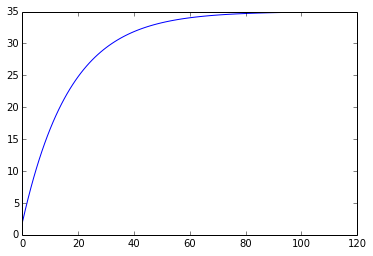

In [128]:
acc = 2.0
spd = 0.0  # m /s^2
drag = acc/30
print(acc/drag )
x = []
y = []
for i in range (121):
    spd = spd + acc - (drag * spd)
    x.append(1.0*i)
    y.append(spd)
        
# print(y)
plt.figure()
plt.plot(x,y)

1.0
0.000771604938272
36.0


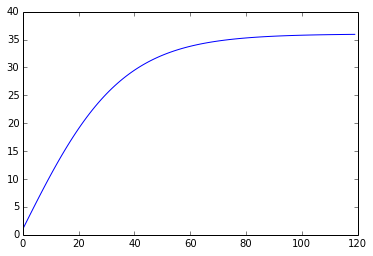

In [22]:
acc = 1.0
print(acc)
spd = 0.0  # m /s^2
desired_final = 36
drag =  acc / (desired_final**2) 
print(drag)
v2 = acc/drag
print(math.sqrt( acc/drag ))
x = []
y = []
for i in range (120):
    spd = spd + acc - (drag * spd * spd)
    x.append(1.0*i)
    y.append(spd)
        
# print(y)
plt.figure()
plt.plot(x,y)

0.00222222222222
6.7082039325


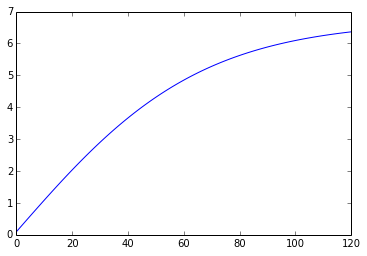

In [137]:
acc = 0.1 
spd = 0.0  # m /s^2
drag =  0.00222222222222
print(drag)
print(math.sqrt( acc/drag ))

x = []
y = []
for i in range (121):
    spd = spd + acc - (drag * spd * spd)
    x.append(1.0*i)
    y.append(spd)
        
# print(y)
plt.figure()
plt.plot(x,y)

0.00222222222222


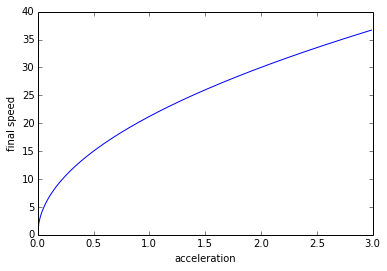

In [7]:
drag =  0.00222222222222
print(drag)

x = []
y = []
for i in range (300):
    acc = i/100.0
    fs = math.sqrt( acc/drag )
    # acc
    x.append(acc)
    y.append(fs)
    
        
# print(y)
plt.figure()
plt.plot(x,y)
plt.ylabel('final speed')
plt.xlabel('acceleration')

5.56


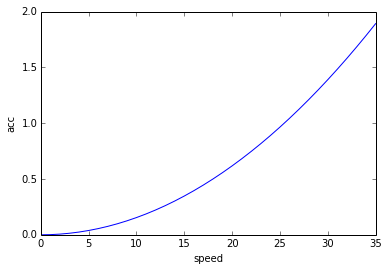

In [42]:
drag = 5.56
print(drag)

x = []
y = []
for speed in range(36):
    acc = drag * (speed**2)
#     fs = math.sqrt( acc/drag )
    # acc
    y.append(acc/3600)
    x.append(speed)
    
        
# print(y)
plt.figure()
plt.plot(x,y)
plt.ylabel('acc')
plt.xlabel('speed')

# teste

In [30]:
angle = math.radians(45)
print(angle)
c_a = math.cos(angle)
s_a = math.sin(angle)
vel = 10
v_x = vel * c_a
v_y = vel * s_a
print("angle",c_a,s_a)
print("vel",v_x,v_y)
drag_factor = 5
drag_total = drag_factor * (vel**2)
print("drag total 1",drag_total)
print("drag total x y",drag_total*c_a, drag_total*s_a)

drag_x = drag_factor * (v_x **2)
drag_y = drag_factor * (v_y **2)
print(drag_x,drag_y)
print(math.hypot(drag_x,drag_y))


0.785398163397
('angle', 0.7071067811865476, 0.7071067811865475)
('vel', 7.0710678118654755, 7.071067811865475)
('drag total 1', 500)
('drag total x y', 353.5533905932738, 353.5533905932737)
(250.00000000000003, 249.99999999999997)
353.553390593


# Angle to Bearing

In [33]:
def normalize_angle_pi(angle):
    # return the angle between -180 and + 180 (in radians)
    while angle < -math.pi:
        angle += 2 * math.pi
    while angle >= math.pi:
        angle -= 2 * math.pi
    return angle

def angle_to_bearing(angle):
    angle_deg = math.degrees(angle)
    return (90.0 - angle_deg) % 360

def bearing_to_angle(bearing):
    angle_rad = math.radians(90 - bearing)
    return normalize_angle_pi(angle_rad)

In [37]:
for b in range(-800,800):
    angle = bearing_to_angle(b)
    b1 = angle_to_bearing(angle)
    print(b,"{:3.2f}".format(b1),angle)

(-800, '280.00', 2.9670597283903604)
(-799, '281.00', 2.9496064358704164)
(-798, '282.00', 2.932153143350474)
(-797, '283.00', 2.91469985083053)
(-796, '284.00', 2.897246558310588)
(-795, '285.00', 2.879793265790644)
(-794, '286.00', 2.8623399732707)
(-793, '287.00', 2.844886680750758)
(-792, '288.00', 2.827433388230814)
(-791, '289.00', 2.8099800957108716)
(-790, '290.00', 2.7925268031909276)
(-789, '291.00', 2.7750735106709836)
(-788, '292.00', 2.7576202181510414)
(-787, '293.00', 2.7401669256310974)
(-786, '294.00', 2.722713633111155)
(-785, '295.00', 2.7052603405912112)
(-784, '296.00', 2.6878070480712672)
(-783, '297.00', 2.670353755551325)
(-782, '298.00', 2.652900463031381)
(-781, '299.00', 2.635447170511437)
(-780, '300.00', 2.617993877991495)
(-779, '301.00', 2.600540585471551)
(-778, '302.00', 2.5830872929516087)
(-777, '303.00', 2.5656340004316647)
(-776, '304.00', 2.5481807079117207)
(-775, '305.00', 2.5307274153917785)
(-774, '306.00', 2.5132741228718345)
(-773, '307.00', 